# Initialize model

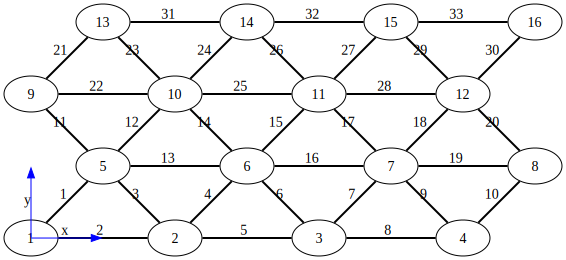

In [2]:
import edge_sim_py as esp

def place_and_migrate_to_least_utilized(parameters):
    for service in esp.Service.all():
        if not service.being_provisioned:
            edge_servers = sorted(
                esp.EdgeServer.all(), key=lambda s: (
                    (s.cpu - s.cpu_demand) 
                   * (s.memory - s.memory_demand) 
                   * (s.disk - s.disk_demand)
                  ) ** (1/3),
                reverse=True,
            )
            for edge_server in edge_servers: # use ordered list
                if edge_server.has_capacity_to_host(service=service):
                    if service.server != edge_server:
                        # print(f"[STEP {parameters['current_step']}] Migrating {service} From {service.server} to {edge_server}")
                        service.provision(target_server=edge_server)
                        break

def stop_on_n_steps(model: object):    
    return model.schedule.steps == 60

# re-initializing but not running the simulator. 
simulator = esp.Simulator(tick_duration=1,tick_unit="seconds",
    stopping_criterion=stop_on_n_steps,
    resource_management_algorithm=place_and_migrate_to_least_utilized,
)
simulator.initialize(input_file="../edgesimpy-tutorials/datasets/sample_dataset2.json")

simulator.visualize()

# Set communications path

I would like to be able to set a communcation path without running the model. This way I know that I am doing somethihng when I use the set_communicatin_path method. For now, I am runnin the model to set comunication paths. 

In [3]:
# No communication paths are set before the model is run. 
simulator.run_model()

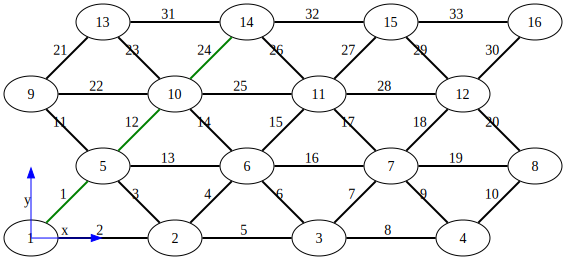

In [4]:
user = esp.User.all()[5]
path = user.communication_paths[str(user.applications[0].id)][0]
def path_to_edge_filter(path):
    path_edges_by_id = [{str(path[i]),str(path[i+1])} for i in range(len(path) -1 )]
    edge_filter = [ {str(node.id) for node in edge.nodes} in path_edges_by_id 
              for edge in esp.NetworkLink.all()]
    return edge_filter

simulator.visualize(path_to_edge_filter(path))

In [5]:
path

[14, 10, 5, 1]

# Remove link in path

In [7]:
# esp.NetworkLink.all()[11].remove()
link = esp.NetworkLink.all()[11]
link.active = False
link.delay = float('inf')
link.failed = True


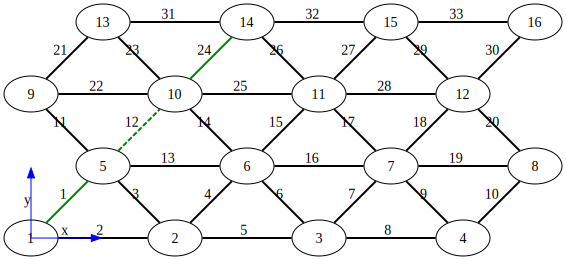

In [8]:
simulator.visualize(path_to_edge_filter(path))

# Set new communication path

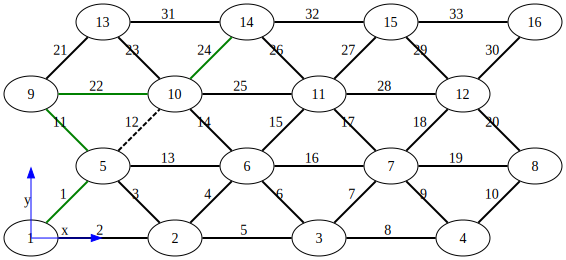

In [9]:
new_path = user.set_communication_path(user.applications[0])[0]
simulator.visualize(path_to_edge_filter(new_path))

In [11]:
user.model.

AttributeError: 'Simulator' object has no attribute 'time'